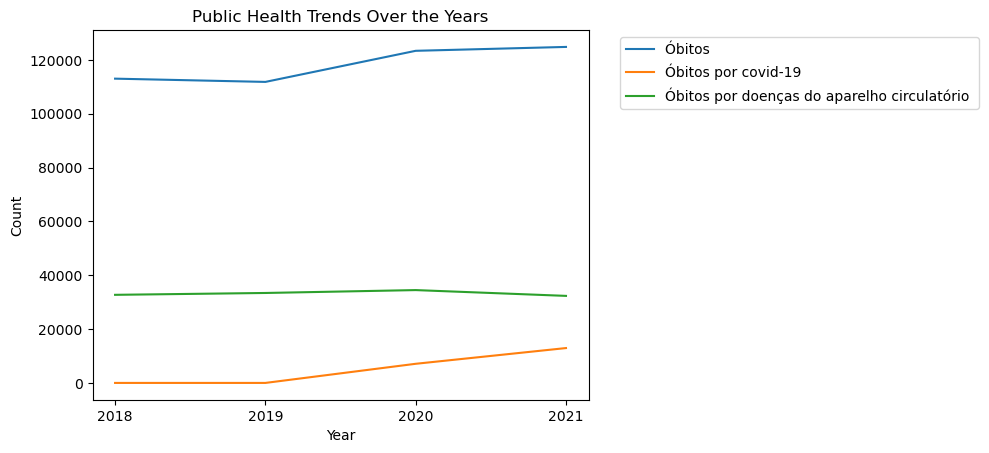

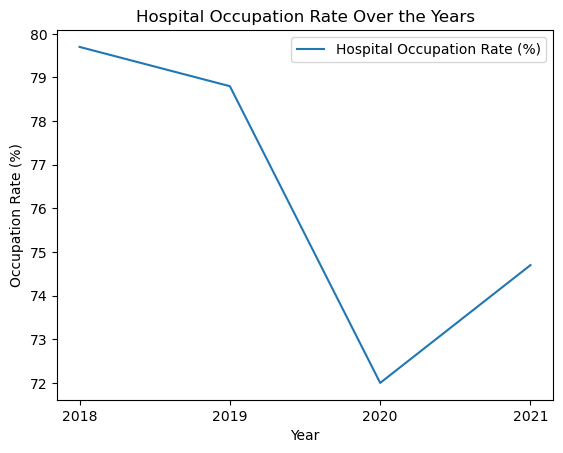

In [14]:
#Como a pandemia afetou a saúde publica?
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Function to load data
def load_data(filename):
    df = pd.read_excel(filename, skiprows=7)  # jumps the first 7 rows
    return df

# Function to clean data
def clean_data(df, label):
    df = df.iloc[:, :-2]  # Remove the last two columns
    row_index = df[df.columns[0]] == label
    data = df.loc[row_index]
    data = data.drop(data.columns[0], axis=1)
    data = data.transpose().reset_index()
    return data

# Main function
def main():
    filename = 'dados.xls'
    data = load_data(filename)

    labels = ['Óbitos ', 'Óbitos por covid-19 ', 'Óbitos por doenças do aparelho circulatório ', 
              ]
    cleaned_data_list = []
    
    for label in labels:
        cleaned_data = clean_data(data, label)
        cleaned_data_list.append(cleaned_data)

    for i, cleaned_data in enumerate(cleaned_data_list):
        try:
            values = cleaned_data.iloc[:, 1].to_numpy()
            index = cleaned_data['index'].to_numpy()

            plt.plot(index, values, label=labels[i])

        except IndexError:
            print(f"Error with label: {labels[i]}")
            continue

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Public Health Trends Over the Years')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # Set the x-axis tick locations and labels
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

    # Separate plot for Hospital Occupation Rate
    cleaned_data_occupation = clean_data(data, 'Taxa de ocupação nos hospitais (%) (8)')
    occupation = cleaned_data_occupation.iloc[:, 1].to_numpy()
    occupation_index = cleaned_data_occupation['index'].to_numpy()

    plt.figure()
    plt.plot(occupation_index, occupation, label='Hospital Occupation Rate (%)')
    plt.xlabel('Year')
    plt.ylabel('Occupation Rate (%)')
    plt.title('Hospital Occupation Rate Over the Years')
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

# Run the main function
if __name__ == '__main__':
    main()
#Resposta: ......